## Libraries Used

In [83]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import Lasso
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error , r2_score , mean_squared_error, mean_absolute_percentage_error
import warnings
warnings.filterwarnings("ignore")
le = LabelEncoder()
scaler = StandardScaler()
rScaller = RobustScaler()

## Data Overview

In [84]:
df = pd.read_csv("Airline Passenger Satisfaction.csv" , sep = "," , encoding = 'utf-8')

In [85]:
# getting the first 10 elements of the dataset by using head() function
df.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [86]:
# getting it's statistical values by using describe() function
df.describe()

,Unnamed: 0,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103594.000000
mean,51951.500000,64924.210502,39.379706,1189.448375,2.729683,3.060296,2.756901,2.976883,3.202129,3.250375,3.439396,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678
std,29994.645522,37463.812252,15.114964,997.147281,1.327829,1.525075,1.398929,1.277621,1.329533,1.349509,1.319088,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.698682
min,0.000000,1.000000,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,25975.750000,32533.750000,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,51951.500000,64856.500000,40.000000,843.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,77927.250000,97368.250000,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,103903.000000,129880.000000,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


In [87]:
# getting the dimensions of the dataset by using shape() function
df.shape

(103904, 25)

##### Dataset consists of 103904 rows and 25 columns

#### Checking if any value in the dataset is duplicated

In [88]:
df.duplicated().any()

False

#### Fortunately There's no item duplicated in the dataset

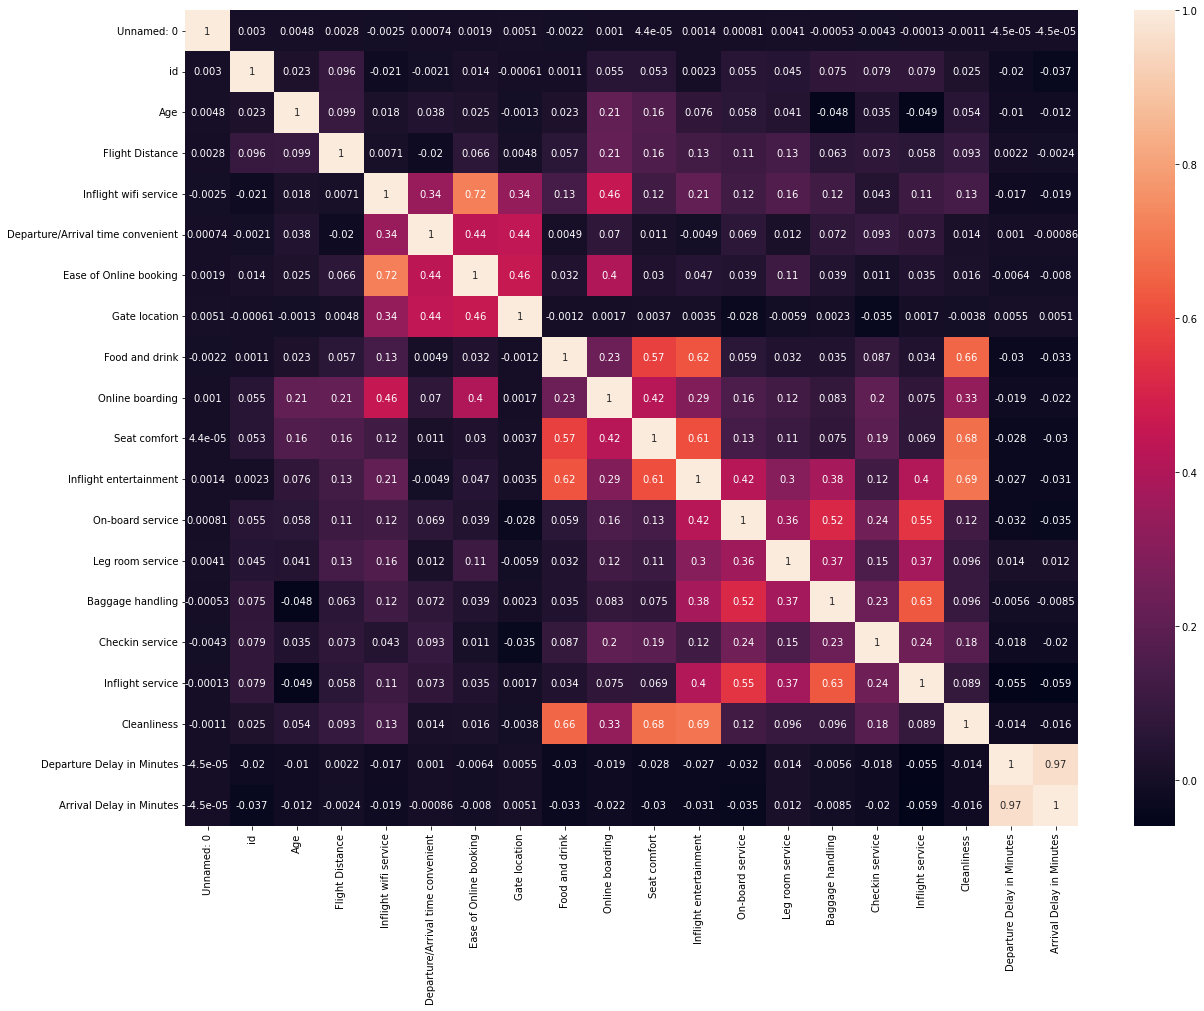

In [89]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

##### There's a multicolinearity between Arrival delay in minutes and Departure Delay in minutes also between inflight entertainment and cleanliness

##### also a coleration between seat comfort , food and drink and the cleanliness

array([[<AxesSubplot:title={'center':'Unnamed: 0'}>,
        <AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Flight Distance'}>],
       [<AxesSubplot:title={'center':'Inflight wifi service'}>,
        <AxesSubplot:title={'center':'Departure/Arrival time convenient'}>,
        <AxesSubplot:title={'center':'Ease of Online booking'}>,
        <AxesSubplot:title={'center':'Gate location'}>],
       [<AxesSubplot:title={'center':'Food and drink'}>,
        <AxesSubplot:title={'center':'Online boarding'}>,
        <AxesSubplot:title={'center':'Seat comfort'}>,
        <AxesSubplot:title={'center':'Inflight entertainment'}>],
       [<AxesSubplot:title={'center':'On-board service'}>,
        <AxesSubplot:title={'center':'Leg room service'}>,
        <AxesSubplot:title={'center':'Baggage handling'}>,
        <AxesSubplot:title={'center':'Checkin service'}>],
       [<AxesSubplot:title={'center':'Inflight service'}>,
    

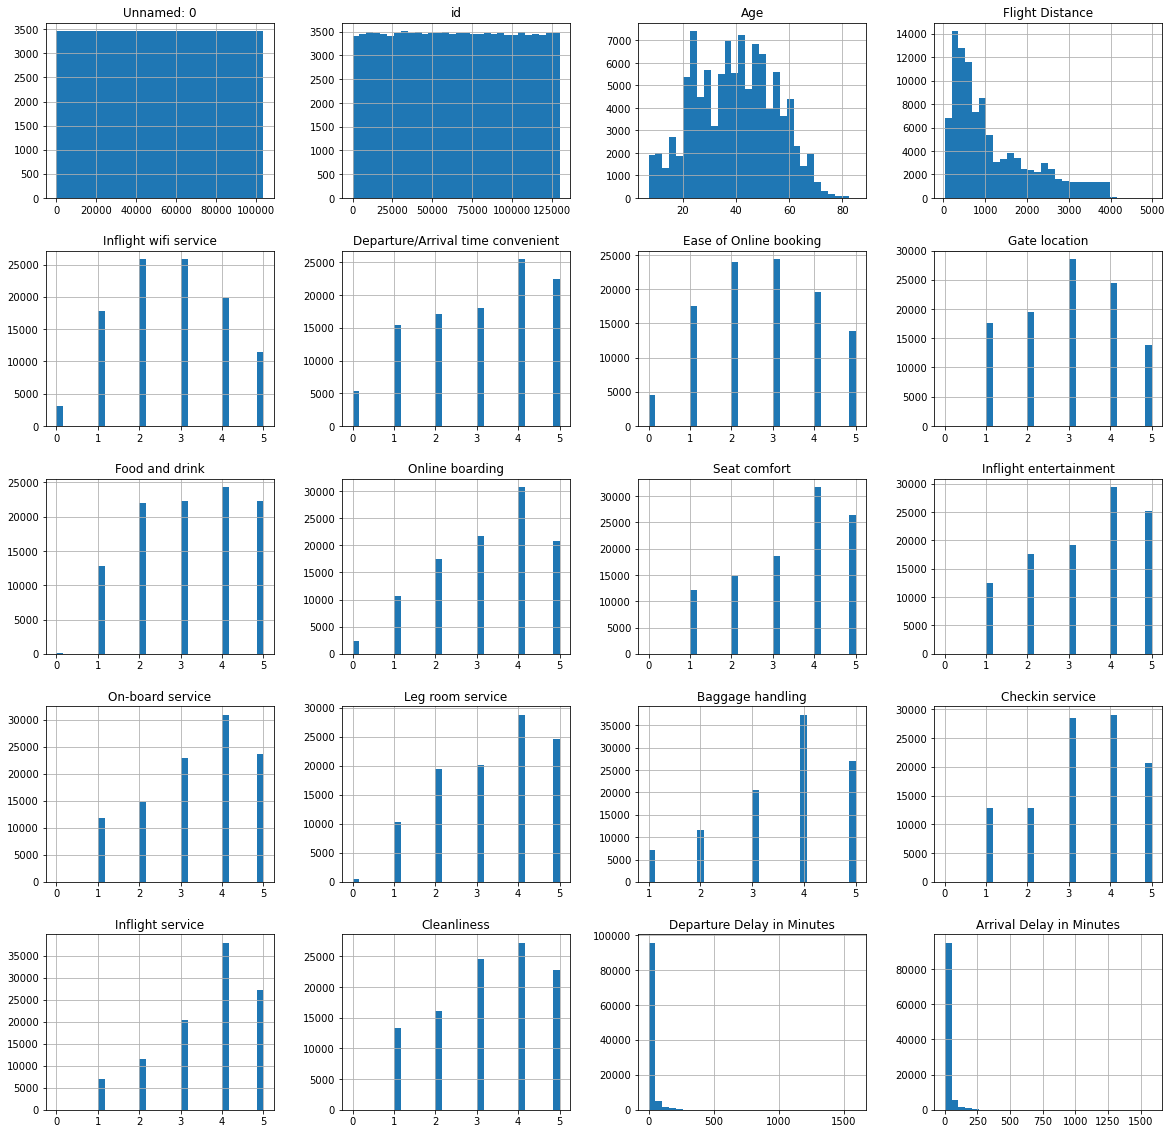

In [90]:
# drawing hist plot graphs for all columns
df.hist(bins=30,figsize=[20,20])

##### as we see from the graphs above most of them are right skewed so we have to fix it

### but first we need to fix the null values if there

#### Checking for the total number of values missing

In [91]:
df.columns

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [92]:
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction    

##### total bedrooms column is the only column that has missing data in it (310 missing values)

##### before fixing it we have to see it's distrbition

In [93]:
df['Ease of Online booking'].value_counts()

3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64

#### filling the missing values and fixing the data

In [94]:
for column in df.columns:
    df[column] = df[column].replace([0],[None])

In [95]:
# making a list that takes the values and fill the missing values 1 by 1 from each side in order to make the ratio stable
fill_list = [1,2,3,4,5]
df['Cleanliness'] = df['Cleanliness'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Inflight service'] = df['Inflight service'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Checkin service'] = df['Checkin service'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Baggage handling'] = df['Baggage handling'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Leg room service'] = df['Leg room service'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['On-board service'] = df['On-board service'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Inflight entertainment'] = df['Inflight entertainment'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Seat comfort'] = df['Seat comfort'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Online boarding'] = df['Online boarding'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Food and drink'] = df['Food and drink'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Gate location'] = df['Gate location'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Ease of Online booking'] = df['Ease of Online booking'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Departure/Arrival time convenient'] = df['Departure/Arrival time convenient'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))
df['Inflight wifi service'] = df['Inflight wifi service'].fillna(pd.Series(np.random.choice(fill_list , size = len(df.index))))


In [96]:
df['Ease of Online booking'].value_counts()

3    25329
2    24910
4    20455
1    18468
5    14742
Name: Ease of Online booking, dtype: int64

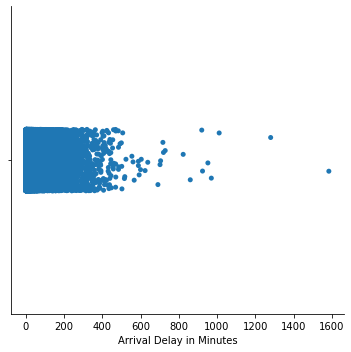

In [97]:
sns.catplot(data=df, x="Arrival Delay in Minutes")

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0                         103903 non-null  object
 1   id                                 103904 non-null  int64 
 2   Gender                             103904 non-null  object
 3   Customer Type                      103904 non-null  object
 4   Age                                103904 non-null  int64 
 5   Type of Travel                     103904 non-null  object
 6   Class                              103904 non-null  object
 7   Flight Distance                    103904 non-null  int64 
 8   Inflight wifi service              103904 non-null  int64 
 9   Departure/Arrival time convenient  103904 non-null  int64 
 10  Ease of Online booking             103904 non-null  int64 
 11  Gate location                      103904 non-null  

<AxesSubplot:xlabel='Arrival Delay in Minutes', ylabel='Departure Delay in Minutes'>

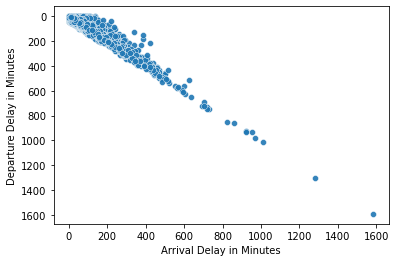

In [99]:
sns.scatterplot(data=df, x="Arrival Delay in Minutes", y="Departure Delay in Minutes",palette="deep",alpha=0.9)

In [100]:
df['Ease of Online booking'].value_counts()

3    25329
2    24910
4    20455
1    18468
5    14742
Name: Ease of Online booking, dtype: int64

In [101]:
# checking again to see if the problem handeled

df['Arrival Delay in Minutes'].isnull().any()

True

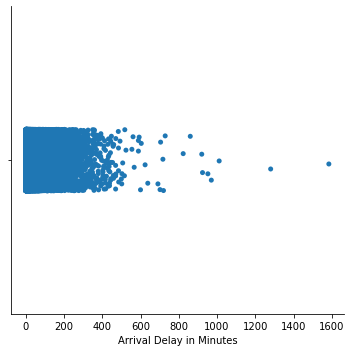

In [102]:
sns.catplot(data=df, x="Arrival Delay in Minutes")

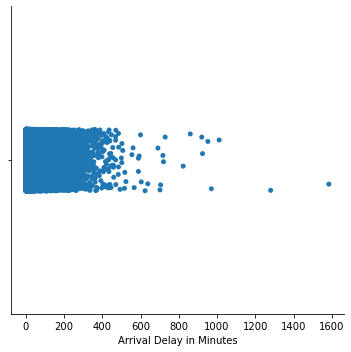

In [103]:
sns.catplot(data=df, x="Arrival Delay in Minutes")

In [104]:
# getting Information about the columns by using info() function
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Unnamed: 0                         103903 non-null  object
 1   id                                 103904 non-null  int64 
 2   Gender                             103904 non-null  object
 3   Customer Type                      103904 non-null  object
 4   Age                                103904 non-null  int64 
 5   Type of Travel                     103904 non-null  object
 6   Class                              103904 non-null  object
 7   Flight Distance                    103904 non-null  int64 
 8   Inflight wifi service              103904 non-null  int64 
 9   Departure/Arrival time convenient  103904 non-null  int64 
 10  Ease of Online booking             103904 non-null  int64 
 11  Gate location                      103904 non-null  

In [105]:
df.rename(columns={'Unnamed: 0': 'Count'} ,inplace=True)

In [106]:
# getting the first 10 elements of the dataset by using head() function
df.head(10)

,Count,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,None,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,None,None,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,None,None,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,None,None,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,None,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,None,None,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,None,None,neutral or dissatisfied


In [107]:
## Encoding

In [108]:
# transforming the datatype (Encoding)
df['satisfaction'] = le.fit_transform(df['satisfaction'])
# transforming the datatype (Encoding)
df['Class'] = le.fit_transform(df['Class'])
# transforming the datatype (Encoding)
df['Customer Type'] = le.fit_transform(df['Customer Type'])
# transforming the datatype (Encoding)
df['Type of Travel'] = le.fit_transform(df['Type of Travel'])

In [109]:
# getting all possible values in column by using value_counts() function
print(df["satisfaction"].value_counts())
print(df["Class"].value_counts())
print(df["Customer Type"].value_counts())
print(df["Type of Travel"].value_counts())
print(df["Gender"].value_counts())

0    58879
1    45025
Name: satisfaction, dtype: int64
0    49665
1    46745
2     7494
Name: Class, dtype: int64
0    84923
1    18981
Name: Customer Type, dtype: int64
0    71655
1    32249
Name: Type of Travel, dtype: int64
Female    52727
Male      51177
Name: Gender, dtype: int64


In [110]:
df['Gender'] = df['Gender'].factorize(['male','female'])[0]

In [111]:
df

,Count,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,None,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18.0,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6.0,0
2,2,110028,0,0,26,0,0,1142,2,2,...,5,4,3,4,4,4,5,None,None,1
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9.0,0
4,4,119299,1,0,61,0,0,214,3,3,...,3,3,4,4,3,3,3,None,None,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,103899,94171,0,1,23,0,1,192,2,1,...,2,3,1,4,2,3,2,3,None,0
103900,103900,73097,1,0,49,0,0,2347,4,4,...,5,5,5,5,5,5,4,None,None,1
103901,103901,68825,1,1,30,0,0,1995,1,1,...,4,3,2,4,5,5,4,7,14.0,0
103902,103902,54173,0,1,22,0,1,1000,1,1,...,1,4,5,1,5,4,1,None,None,0


In [112]:
print(df["Gender"].value_counts())

0    52727
1    51177
Name: Gender, dtype: int64


In [113]:
# displaying the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Count                              103903 non-null  object
 1   id                                 103904 non-null  int64 
 2   Gender                             103904 non-null  int64 
 3   Customer Type                      103904 non-null  int32 
 4   Age                                103904 non-null  int64 
 5   Type of Travel                     103904 non-null  int32 
 6   Class                              103904 non-null  int32 
 7   Flight Distance                    103904 non-null  int64 
 8   Inflight wifi service              103904 non-null  int64 
 9   Departure/Arrival time convenient  103904 non-null  int64 
 10  Ease of Online booking             103904 non-null  int64 
 11  Gate location                      103904 non-null  

#### now we can handle the outliers

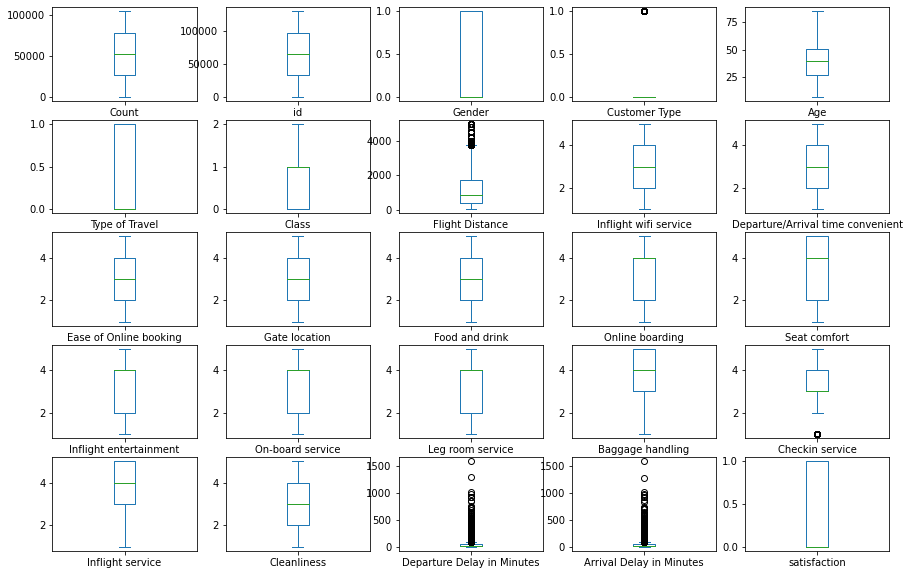

In [114]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,10))
plt.show()

##### we will handle only a part of the outliers but not all in order to not spoiling the dataset using conditions

In [115]:
# updating the dataframe without affecting on the dataset

df = df[(df['Flight Distance']<=4000)&(df['Departure Delay in Minutes']<=550)&(df['Arrival Delay in Minutes']<=550)]
df['Count']=df['Count'].fillna(df['Count'].bfill())


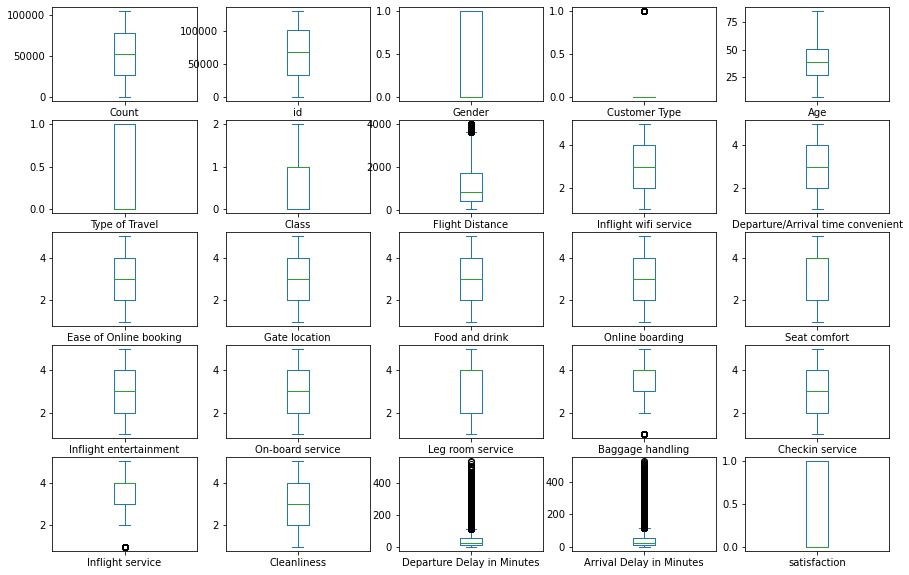

In [116]:
# drawing a box plots for all columns

df.plot(kind='box', subplots=True, layout=(5,5), figsize=(15,10))
plt.show()

##### The right skewed outliers are shortened but not all of it in order to not sabotage the dataset

##### outliers are handeled without affecting the dataframe

## Train Test Spliting

In [117]:
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].astype(int)
df['Departure Delay in Minutes'] = df['Departure Delay in Minutes'].astype(int)


In [118]:
df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())


In [119]:
df['Arrival Delay in Minutes']= df['Arrival Delay in Minutes'].astype(int)



In [120]:
x = df.drop(['satisfaction'], axis=1).values
y = df['satisfaction'].values

In [121]:
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size=0.25 , random_state = 42,shuffle=True)

In [122]:
x_train.shape

(25721, 24)

In [123]:
y_train.shape

(25721,)

In [124]:
x_test.shape

(8574, 24)

#### scalling the data

In [125]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

### Logistic Regression

In [126]:
df

,Count,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,70172,1,0,13,1,2,460,3,4,...,5,4,3,4,4,5,5,25,18,0
1,1,5047,1,1,25,0,0,235,3,2,...,1,1,5,3,1,4,1,1,6,0
3,3,24026,0,0,25,0,0,562,2,5,...,2,2,5,3,1,4,2,11,9,0
6,6,82113,1,0,47,1,1,1276,2,4,...,2,3,3,4,3,5,2,9,23,0
12,12,98628,1,0,53,0,1,834,1,4,...,1,1,1,3,4,4,1,28,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103892,103892,46016,0,1,37,0,0,596,3,3,...,3,1,1,3,1,4,3,110,121,0
103894,103894,86549,1,0,26,0,0,712,4,4,...,5,3,4,4,3,4,5,17,26,1
103895,103895,66030,0,1,24,0,1,1055,1,1,...,1,3,3,5,5,4,1,13,10,0
103897,103897,102203,0,0,60,0,0,1599,5,5,...,4,4,4,4,4,4,4,9,7,1


In [127]:
lr = LogisticRegression()

In [128]:
lr.fit(x_train , y_train)

LogisticRegression()

In [129]:
lr.score(x_train , y_train)

0.7001282998328214

In [130]:
lr.score(x_test , y_test)

0.7065547002565897

In [131]:
x_train2=rScaller.fit_transform(x_train)

In [132]:
x_test2=rScaller.fit_transform(x_test)

In [133]:
lr2=LogisticRegression()

In [134]:
lr2.fit(x_test2,y_test)

LogisticRegression()

## KNN

In [135]:
k1=KNeighborsClassifier(n_neighbors=8)

In [136]:
k1.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=8)

In [137]:
k1.score(x_train,y_train)

0.703705143656934

In [138]:
k1.score(x_test,y_test)

0.6401912759505481

In [139]:
y_pred=lr.predict(x_test)
data=pd.DataFrame({'y_Test  ':y_test,'y_pred  ':y_pred})
data[:25]

,y_Test,y_pred
0,0,0
1,0,0
2,0,0
3,1,0
4,0,0
5,1,0
6,0,1
7,0,1
8,0,0
9,0,1


In [140]:
import numpy as np
import matplotlib.pyplot as plt
from pandas import read_csv
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [142]:

# LSTM for international airline passengers problem with time step regression framing

# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [143]:
# load the dataset
df = read_csv('Airline Passenger Satisfaction.csv', usecols=[1], engine='python')
dataset = df.values
dataset = dataset.astype('float32')

In [144]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [145]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [146]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [147]:
# reshape into X=t and Y=t+1
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [148]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [149]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=10, batch_size=1, verbose=2)

Epoch 1/10
69611/69611 - 149s - loss: 0.0840 - 149s/epoch - 2ms/step
Epoch 2/10
69611/69611 - 147s - loss: 0.0836 - 147s/epoch - 2ms/step
Epoch 3/10
69611/69611 - 148s - loss: 0.0835 - 148s/epoch - 2ms/step
Epoch 4/10
69611/69611 - 147s - loss: 0.0835 - 147s/epoch - 2ms/step
Epoch 5/10
69611/69611 - 149s - loss: 0.0834 - 149s/epoch - 2ms/step
Epoch 6/10
69611/69611 - 150s - loss: 0.0834 - 150s/epoch - 2ms/step
Epoch 7/10
69611/69611 - 147s - loss: 0.0834 - 147s/epoch - 2ms/step
Epoch 8/10
69611/69611 - 149s - loss: 0.0834 - 149s/epoch - 2ms/step
Epoch 9/10
69611/69611 - 153s - loss: 0.0834 - 153s/epoch - 2ms/step
Epoch 10/10
69611/69611 - 160s - loss: 0.0834 - 160s/epoch - 2ms/step


In [150]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

1072/1072 [==============================] - 2s 2ms/step


In [151]:
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])

In [152]:
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 37506.75 RMSE
Test Score: 37511.27 RMSE


In [153]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict

In [154]:
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict

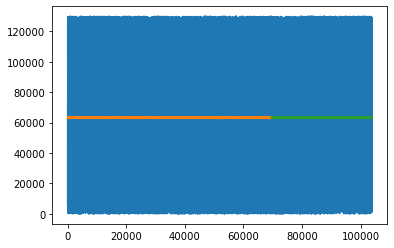

In [155]:
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()